## Y90 Positron Spectrum for GATE

### This script generates and plots an approximate positron energy spectrum for Yttrium-90 (Y90) using a parabolic function. The spectrum is numerically normalized so that its integral over the 0–739 keV range equals 1, ensuring a valid probability distribution. The resulting energy–probability data are saved to a text file for later use in GATE, and the normalization is verified through numerical integration.

#### Note: Update the directory path in the script to the desired location where the output file should be saved.

#### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad       
import os

In [ ]:
# Funcion of parabola that describes the approximate spectrum of positrons from theoretically estimated continuous positron energy spectrum produced via IPP

# ------------------------------------------------------------------
# Define the parabola function for the approximate positron spectrum
# ------------------------------------------------------------------

def f(x, x0, y0, N):
    return -x * (x - 2 * x0) * (y0 / x0**2) / N

# x: energy value (keV)
# x0: peak energy position of positrons
# y0: normalization constant
# N: normalization factor (so that the function integrates to 1 over the energy range)

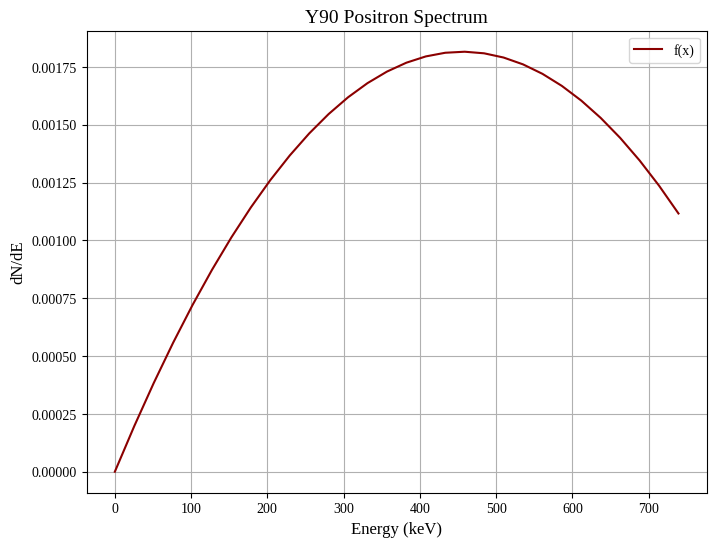

Integral of f(x): 1.0
File saved at: /home/administrator/Secretária/Y90_positronSpectrum/Y90_positron_spectrum_KeV.txt


In [5]:
# Constants 
Nr_Points = 30 # number of points to extract
x0        = 456 # energy at which the parabola peaks
y0        = 1   # scaling factor for the parabola
xMax      = 739 # maximum positron energy (spectrum cutoff)

# integrate the function f(x) from 0 to xMax
N, _ = quad(lambda x: f(x, x0=x0, y0=y0, N=1), 0, xMax)

# Create x values and compute f(x)
x_values = np.linspace(0, xMax, Nr_Points)
y_values = f(x_values, x0=x0, y0=y0, N=N)

# Save data into a folder
# Define the directory path and file name
directory_path = "/home/administrator/Secretária/Y90_positronSpectrum" # change the name of the directory to save the file
file_name = "Y90_positron_spectrum_KeV.txt"  # define the file name
file_path = f"{directory_path}/{file_name}"  # Combine path and filename

np.savetxt(file_path, np.column_stack((x_values, y_values)), delimiter='\t', fmt='%.10f')
df_loaded = pd.read_csv(file_path, sep='\t', header=None, names=['x', 'f(x)'])

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(df_loaded['x'], df_loaded['f(x)'], label='f(x)', color = 'darkred')
plt.xlabel('Energy (keV)', fontsize='12')
plt.ylabel('dN/dE', fontsize='12')
plt.title('Y90 Positron Spectrum', fontsize='14')
plt.grid(True)
plt.legend()

 # Apply font settings (Times-like)
plt.rcParams.update({
        "font.family": "serif",
        "font.serif": ["Liberation Serif"],
        "mathtext.fontset": "dejavuserif",
})

plt.show()

# Integrate using scipy.integrate.quad
# check normalization
integral_result, _ = quad(lambda x: f(x, x0=x0, y0=y0, N=N), 0, xMax)
print("Integral of f(x):", integral_result)

print("File saved at:", file_path)

In [9]:
# === Convert energy to MeV and add GATE LinearInterpolationSpectrum header ===

# Define input (original) and output file paths
input_file = file_path  # file created in previous cell (in keV)
output_file = file_path.replace(".txt", "_to_MeV_GATE.txt")  # new file for GATE (in MeV)

# Load data
data = np.loadtxt(input_file)  # columns: energy (keV), probability

# Convert energy from keV to MeV
data[:, 0] /= 1000.0  # 1 MeV = 1000 keV

# Save new file with GATE header
with open(output_file, "w") as fout:
    fout.write("################ LinearInterpolationSpectrum.txt #############\n")
    fout.write("3   0\n")
    np.savetxt(fout, data, delimiter='\t', fmt='%.10f')

print("✅ GATE-formatted spectrum file (in MeV) created:")
print(output_file)

✅ GATE-formatted spectrum file (in MeV) created:
/home/administrator/Secretária/Y90_positronSpectrum/Y90_positron_spectrum_KeV_to_MeV_GATE.txt
